In [ ]:
#Use conda env hail_plot (python 3.10, matplotlib 3.5)
import pickle as pk
import os
import sys
import glob
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import datetime
import random
import scipy
from scipy.spatial import distance

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [2]:
#Import hailsensor data for 20210620 from csv file
path_sen = '/home/martin/container/hail/sensors_martin.csv'

dat = pd.read_csv(path_sen)
dat = dat[dat['days'] == '2021-06-20']

In [3]:
sens_lon = dat['Lon'].values
sens_lat = dat['Lat'].values
print('LAT: ', find_nearest(sens_lat,value=46.987189))
print('LON: ', find_nearest(sens_lon,value=8.059468))

LAT:  46.99239624689583
LON:  8.05733755654304


In [5]:
np.where(sens_lon == 8.05733755654304)

(array([51, 52, 53]),)

In [60]:
dat_wasHAS['datetime'] = pd.to_datetime(dat_wasHAS['Time'], format='%Y-%m-%d %H:%M:%S.%f')

In [4]:
#Get HS data from four closest sensors
#Sensor1
dat_schENT = dat[dat['sensorName'] == 'SchulhausENTLEBUCH']
hs_schENT = dat_schENT['diameter'].values

#Sensor2
dat_lusENT = dat[dat['sensorName'] == 'LustenbergerENTLEBUCH']
hs_lusENT = dat_lusENT['diameter'].values

#Sensor3
dat_wasHAS = dat[dat['sensorName'] == 'WasserHASLE']
hs_wasHAS = dat_wasHAS['diameter'].values

#Sensor4 - kein Einschlag
dat_porHAS = dat[dat['sensorName'] == 'PortmannHASLE']
hs_porHAS = dat_porHAS['diameter'].values

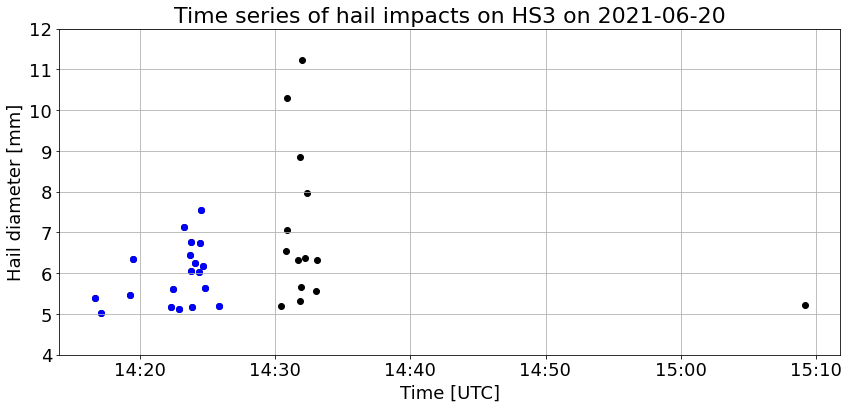

In [78]:
#HS3 time series of impacts for event separation
import matplotlib.dates as mdates
plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(dat_wasHAS['datetime'], dat_wasHAS['diameter'], c='k')
ax.scatter(dat_wasHAS['datetime'][0:19], dat_wasHAS['diameter'][0:19], c='b')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.grid()
ax.set_title('Time series of hail impacts on HS3 on 2021-06-20')
ax.set_xlabel('Time [UTC]')
ax.set_ylabel('Hail diameter [mm]')
ax.set_ylim([4,12])
plt.savefig(plot_dir+'HS3_timeseries.png',dpi=400,bbox_inches='tight',facecolor='white')

In [2]:
hd_part1 = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/hail_20210620_r1/all_images/hail_sizes/part1/hail_dict.pkl'
hd_part2 = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/hail_20210620_r1/all_images/hail_sizes/part2/hail_dict.pkl'
hd_part3 = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/hail_20210620_r1/all_images/hail_sizes/part3/hail_dict.pkl'

#List of indexes which are no hail:
no_hail_part1 = [3751] # leaves etc.
no_hail_part2 = [2939, 3250]

with open(hd_part1,'rb') as f:
    hd_p1 = pk.load(f)

for ind in no_hail_part1:
    hd_p1['major_ma'][ind] = np.nan
    hd_p1['minor_ma'][ind] = np.nan
    hd_p1['L_center'][ind] = np.nan
    
with open(hd_part2,'rb') as f:
    hd_p2 = pk.load(f)
    
for ind in no_hail_part2:
    hd_p2['major_ma'][ind] = np.nan
    hd_p2['minor_ma'][ind] = np.nan
    hd_p2['L_center'][ind] = np.nan
        
with open(hd_part3,'rb') as f:
    hd_p3 = pk.load(f)
    
ds = [hd_p1, hd_p2, hd_p3]
d = {}
for k in ['L_center', 'major_ma', 'minor_ma','hail_co']:
    d[k] = tuple(d[k] for d in ds)

L_center = np.hstack(np.asarray(d['L_center'][:]))
major_ax = np.hstack(np.asarray(d['major_ma'][:]))
minor_ax =  np.hstack(np.asarray(d['minor_ma'][:]))
hail_co_x = np.hstack([d['hail_co'][0][0],d['hail_co'][1][0],d['hail_co'][2][0]])
hail_co_y = np.hstack([d['hail_co'][0][1],d['hail_co'][1][1],d['hail_co'][2][1]])

/tmp/ipykernel_9876/2936827638.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  L_center = np.hstack(np.asarray(d['L_center'][:]))
/tmp/ipykernel_9876/2936827638.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  major_ax = np.hstack(np.asarray(d['major_ma'][:]))
/tmp/ipykernel_9876/2936827638.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when crea

In [9]:
major_ax

array([ 9. ,  7.5, 10.5, ...,  4.5, 22.5,  6. ])

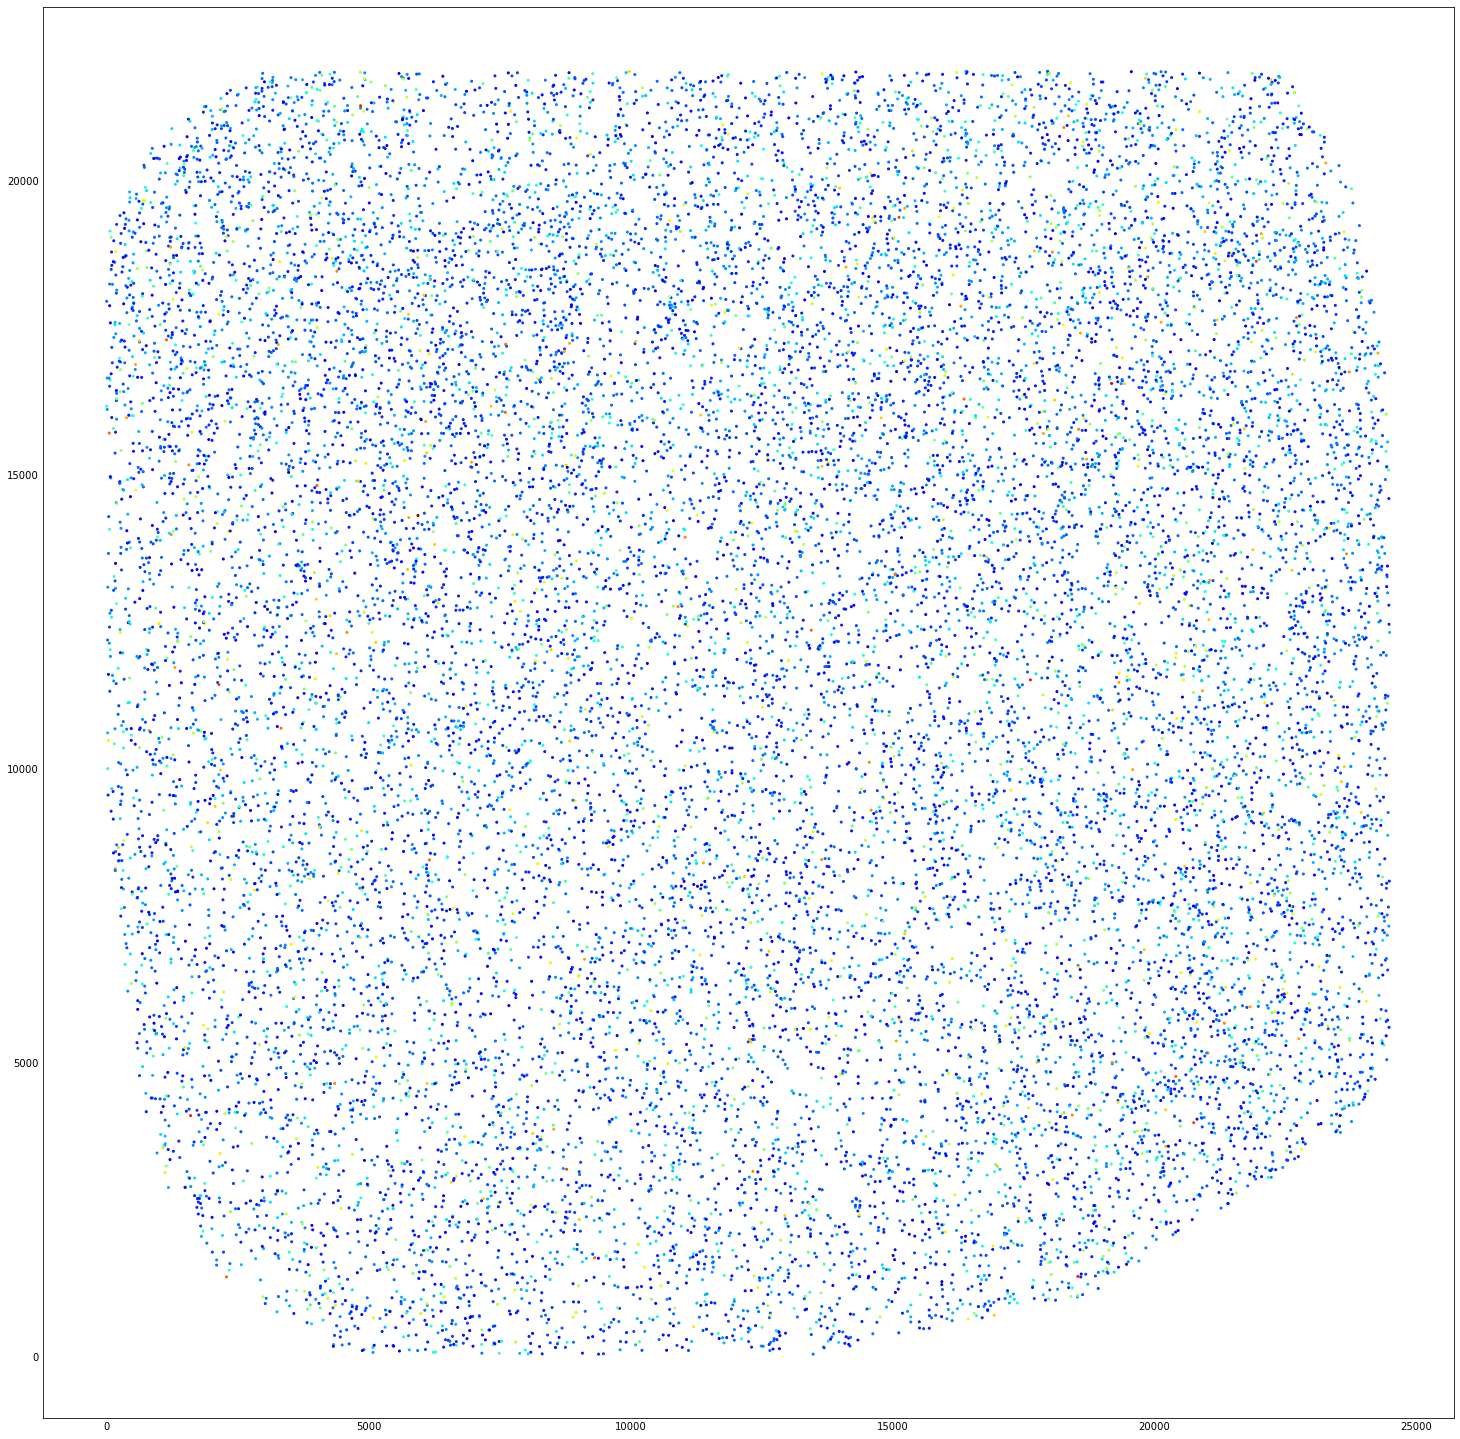

In [33]:
#Analyse spatial size distribution of hail on survey area
fig, ax = plt.subplots(1,1,figsize=[20,20])
ax.scatter(hail_co_x,hail_co_y,s=4,c=major_ax,cmap='jet')

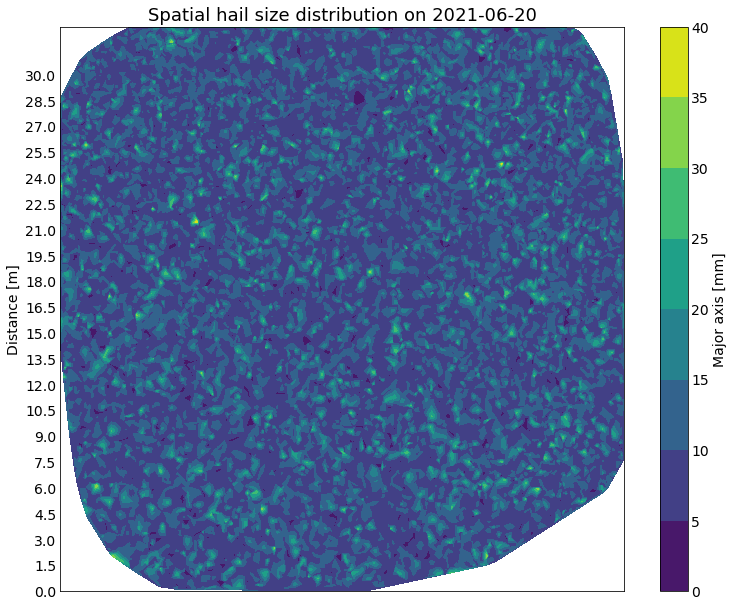

In [73]:
import matplotlib.pyplot as plt
import numpy as np

#Plot averaged (mean) histogram over all 10000 sensors plus result from the real 4 sensors close by
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('_mpl-gallery-nogrid')

# plot
fig, ax = plt.subplots(figsize=[10,8])

cntr = ax.tricontourf(hail_co_x, hail_co_y, major_ax,cmap='viridis')
cb = fig.colorbar(cntr, ax=ax, label='Major axis [mm]')
ax.set_title('Spatial hail size distribution on 2021-06-20')

xt = np.linspace(0,20000,21)
yt = np.linspace(0,20000,21)

ytl = []
for y in yt:
    ytl.append(str(y*1.5/1000))

ax.set_xticks([])
ax.set_yticks(yt)
ax.set_yticklabels(ytl)
ax.set_ylabel('Distance [m]')

plt.show()

In [68]:
ytl

['0.0',
 '1.5',
 '3.0',
 '4.5',
 '6.0',
 '7.5',
 '9.0',
 '10.5',
 '12.0',
 '13.5',
 '15.0',
 '16.5',
 '18.0',
 '19.5',
 '21.0',
 '22.5',
 '24.0',
 '25.5',
 '27.0',
 '28.5',
 '30.0']

In [ ]:
import random
#Ground samppling distance [mm]
gsd = 1.5

#Coordinates to place sensor within
xmin = 2400
xmax = 19393
ymin = 3700
ymax = 19393

nsens = 10000
vsensor_dict = {}
vsens_co = []

vsensor_dict['dist'] = []
vsensor_dict['major'] = []
vsensor_dict['minor'] = []
vsensor_dict['hail_x'] = []
vsensor_dict['hail_y'] = []
    
for n in range(0,nsens):
    #Randomly place hailsensor on field and save hits
    xrand = random.randrange(xmin,xmax)
    yrand = random.randrange(ymin,ymax)
    sens_co = (xrand, yrand)

    vsens_co.append(sens_co)
    
    dist_list = []
    major_list = []
    minor_list = []
    hail_x = []
    hail_y = []

    for i,x in enumerate(hail_co_x):
        y = hail_co_y[i] 
        hail_co = (x, y)
        dist = distance.euclidean(sens_co, hail_co) * gsd
        if dist <= 250:
            dist_list.append(dist)
            major_list.append(major_ax[i])
            minor_list.append(minor_ax[i])
            hail_x.append(x)
            hail_y.append(y)
            
    vsensor_dict['dist'].append(dist_list)
    vsensor_dict['major'].append(major_list)
    vsensor_dict['minor'].append(minor_list)
    vsensor_dict['hail_x'].append(hail_x)
    vsensor_dict['hail_y'].append(hail_y)
    
vsensor_dict['vsens_co'] = vsens_co

#Save dictionary:
with open('vsensor_R10000_600m2.pkl','wb') as f:
    vsensor_dict = pk.dump(vsensor_dict, f)

In [41]:
#Open dictionary:
nsens = 10000
with open('vsensor_R10000_600m2.pkl','rb') as f:
    vsensor_dict = pk.load(f)

#Percentage Sensors with no hits
count = 0
for li in vsensor_dict['major']:
    if not li:
        count = count + 1
print('% Sensor:',(count/nsens)*100)
print('Number of no hits:', count)

% Sensor: 4.66
Number of no hits: 466


In [64]:
#How many sensors got an impact larger than 10, 20 and 30mm?
nsens = 10000
th=[10,20,30]

for t in th:
    count = 0
    for li in vsensor_dict['major']:
        liar =  np.array(li)
        if np.size(np.where(liar > t)[0]) != 0:
            #print(np.where(liar >= t)[0])
            count = count + 1

    print('% Sensor:',(count/nsens)*100)
    print('Number of sensors with impacts geq than '+str(t)+':', count)

% Sensor: 65.75999999999999
Number of sensors with impacts geq than 10: 6576
% Sensor: 9.879999999999999
Number of sensors with impacts geq than 20: 988
% Sensor: 0.33999999999999997
Number of sensors with impacts geq than 30: 34


In [38]:
li = [10,34,5,6,7]

In [42]:
liar =  np.array(li)
np.where(liar > 30)[0]

array([1])

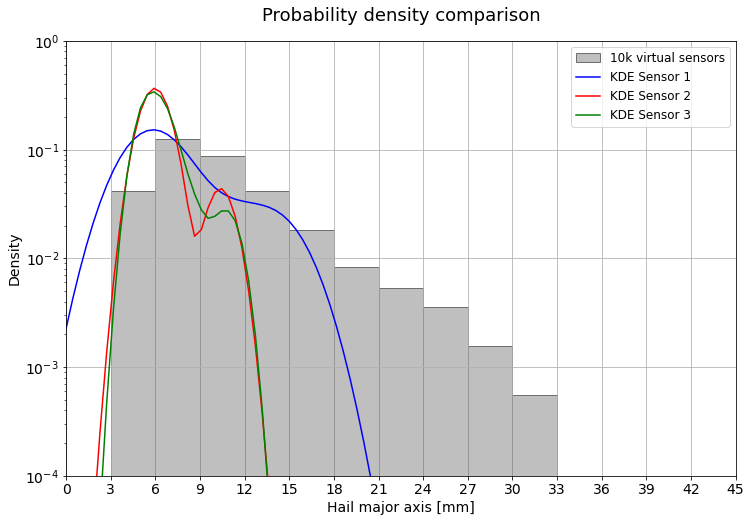

In [6]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

#Plot averaged (mean) histogram over all 10000 sensors plus result from the real 4 sensors close by
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_dir = '/home/martin/container/hail/dimeto/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    
xx = np.linspace(0,45,100)
kde_schENT = stats.gaussian_kde(hs_schENT)
kde_lusENT = stats.gaussian_kde(hs_lusENT)
kde_wasHAS = stats.gaussian_kde(hs_wasHAS)

fig, ax = plt.subplots(figsize=(12,8))

full_ar = np.concatenate(vsensor_dict['major'])

numBins = 18
hist, bins = np.histogram(full_ar,numBins,range=[3,45+12])
# Normalize by 10000
hist_norm = hist / 10000

counts, edges, bars = ax.hist(full_ar,numBins,range=[3,45+12],color=['grey'],alpha=0.5, edgecolor='black',density=True, label='10k virtual sensors')

ax.plot(xx, kde_schENT(xx),color='blue',label='KDE Sensor 1')
ax.plot(xx, kde_lusENT(xx),color='red',label='KDE Sensor 2')
ax.plot(xx, kde_wasHAS(xx),color='green',label='KDE Sensor 3')

#ax.hist(hs_schENT,numBins,range=[3,45+12],color=['blue'],alpha=0.2, edgecolor='black',density=True)
#ax.hist(hs_lusENT,numBins,range=[3,45+12],color=['green'],alpha=0.2, edgecolor='black',density=True)
#ax.hist(hs_wasHAS,numBins,range=[3,45+12],color=['red'],alpha=0.2, edgecolor='black',density=True)
#ax.hist(hs_schHAS,numBins,range=[3,45+12],color=['yellow'],alpha=0.2, edgecolor='black',density=True)

plt.xlabel('Hail major axis [mm]')
plt.ylabel('Density')
plt.yscale('log')
plt.ylim([0.0001,1])
plt.xlim([0,45])
plt.xticks(np.linspace(0,39+6,14+2))
plt.title('Probability density comparison', pad=20)
plt.grid()
plt.legend()

plt.savefig(plot_dir+'20210620_comparison_prob-density_ylog.png',dpi=300,bbox_inches='tight',facecolor='white')

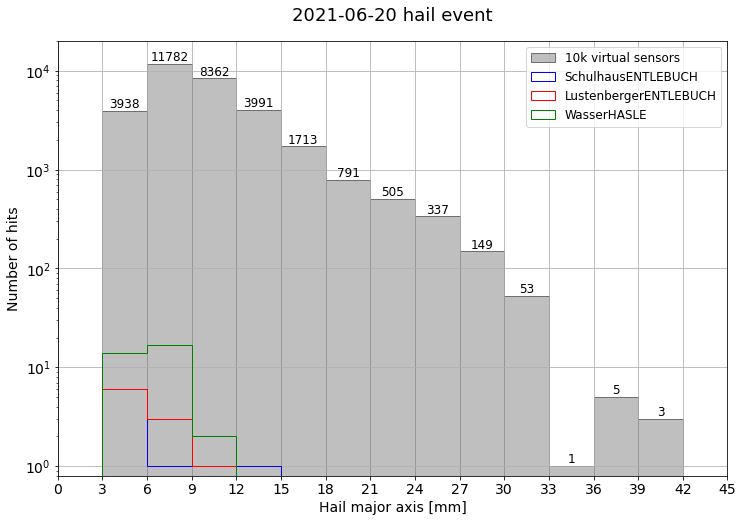

In [21]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

#Plot averaged (mean) histogram over all 10000 sensors plus result from the real 4 sensors close by
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_dir = '/home/martin/container/hail/dimeto/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    
xx = np.linspace(0,45,100)
kde_schENT = stats.gaussian_kde(hs_schENT)
kde_lusENT = stats.gaussian_kde(hs_lusENT)
kde_wasHAS = stats.gaussian_kde(hs_wasHAS)

fig, ax = plt.subplots(figsize=(12,8))

full_ar = np.concatenate(vsensor_dict['major'])

numBins = 18
hist, bins = np.histogram(full_ar,numBins,range=[3,45+12])
# Normalize by 10000
hist_norm = hist / 10000

counts, edges, bars = ax.hist(full_ar,numBins,range=[3,45+12],color=['grey'],alpha=0.5, edgecolor='black',density=False, label='10k virtual sensors')

#ax.plot(xx, kde_schENT(xx),color='blue',label='KDE Sensor 1')
#ax.plot(xx, kde_lusENT(xx),color='red',label='KDE Sensor 2')
#ax.plot(xx, kde_wasHAS(xx),color='green',label='KDE Sensor 3')

ax.hist(hs_schENT,numBins,range=[3,45+12],color=['blue'], histtype='step', density=False, label='SchulhausENTLEBUCH')
ax.hist(hs_lusENT,numBins,range=[3,45+12],color=['red'], histtype='step', density=False, label='LustenbergerENTLEBUCH')
ax.hist(hs_wasHAS,numBins,range=[3,45+12],color=['green'], histtype='step', density=False, label='WasserHASLE')
#ax.hist(hs_schHAS,numBins,range=[3,45+12],color=['yellow'],alpha=0.2, edgecolor='black',density=True)

ax.bar_label(bars)
plt.xlabel('Hail major axis [mm]')
plt.ylabel('Number of hits')
plt.yscale('log')
plt.ylim([0.8,20000])
plt.xlim([0,45])
plt.xticks(np.linspace(0,39+6,14+2))
plt.title('2021-06-20 hail event', pad=20)
plt.grid()
plt.legend()

plt.savefig(plot_dir+'20210620_NHITS_comparison.png',dpi=300,bbox_inches='tight',facecolor='white')

In [48]:
str_lab = []
lab = np.linspace(0,36,19,dtype='int')
for i in lab:
    str_lab.append(str(i))
str_lab = np.asarray(str_lab)

In [32]:
np.asarray(str_lab)

array(['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22',
       '24', '26', '28', '30', '32', '34', '36'], dtype='<U2')

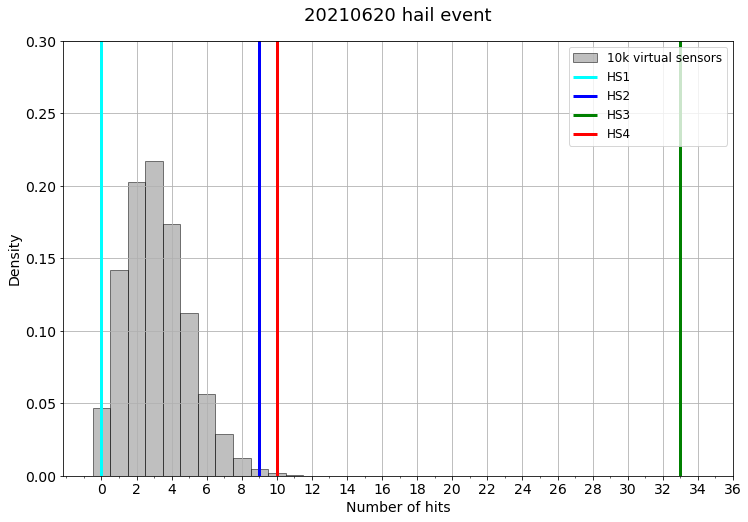

In [42]:
from scipy import stats
import warnings
import matplotlib.ticker as tck
from matplotlib.ticker import MultipleLocator
warnings.filterwarnings("ignore")

#Plot averaged (mean) histogram over all 10000 sensors plus result from the real 4 sensors close by
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_dir = '/home/martin/container/hail/paper/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    
#Make array of number of hits
nb_hits = []
for hits in vsensor_dict['major']:    
    nb = np.size(hits)
    nb_hits.append(nb)
    
nb_hits = np.asarray(nb_hits)
    
fig, ax = plt.subplots(figsize=(12,8))

numBins = 13
counts, edges, bars = ax.hist(nb_hits,numBins,range=[-0.5,12.5],color=['grey'],alpha=0.5, edgecolor='black',density=True, label='10k virtual sensors')

plt.vlines(0,0,1, color='cyan',linewidth=3,label='HS1')
plt.vlines(np.size(hs_schENT),0,1, color='blue',linewidth=3,label='HS2')
plt.vlines(np.size(hs_wasHAS),0,1, color='green',linewidth=3,label='HS3')
plt.vlines(np.size(hs_lusENT),0,1, color='red',linewidth=3,label='HS4')

#ax.bar_label(bars)
plt.xlabel('Number of hits')
plt.ylabel('Density')
#plt.yscale('log')
plt.ylim([0,0.3])
#plt.xlim([0,45])
plt.xticks(np.linspace(0,36,19))
ax.set_xticklabels(str_lab)

ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.title('20210620 hail event', pad=20)
plt.grid()
plt.legend()

plt.savefig(plot_dir+'20210620_nb_hits_density.png',dpi=300,bbox_inches='tight',facecolor='white')

In [35]:
nb

33

In [46]:
#Make list of largest hits per V-Sensor
largest_hail_list = []
for hits in vsensor_dict['major']:
    if not hits:
        continue
    else:    
        lhail = np.max(hits)
        largest_hail_list.append(lhail)

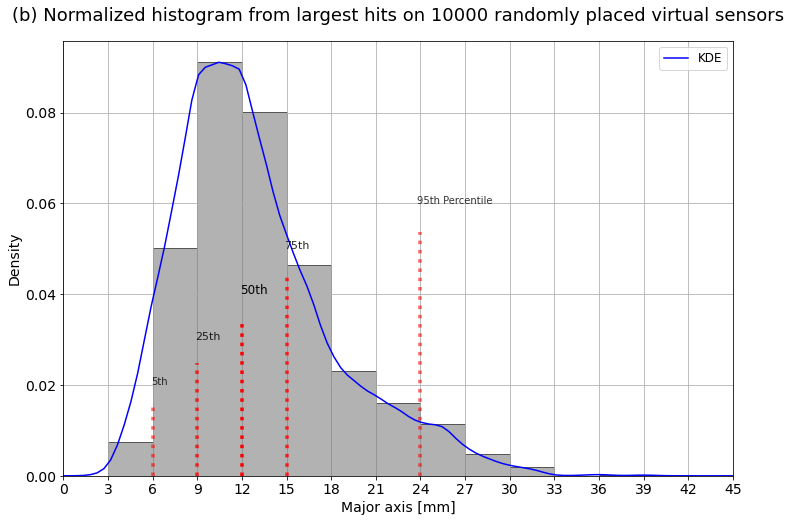

In [56]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'

fig, ax = plt.subplots(figsize=(12,8))

xx = np.linspace(0,45,100)
lh_data = np.array(largest_hail_list)[~np.isnan(largest_hail_list)]
kde = stats.gaussian_kde(lh_data)
ax.plot(xx, kde(xx),color='blue',label='KDE')

numBins = 18
counts, edges, bars = ax.hist(lh_data,numBins,range=[3,45+12],color=['grey'],alpha=0.6, edgecolor='black',density=True)

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = np.nanquantile(lh_data, 0.05), np.nanquantile(lh_data, 0.25), np.nanquantile(lh_data, 0.5), np.nanquantile(lh_data, 0.75), np.nanquantile(lh_data, 0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":",color='red',linewidth=3.5)

ax.text(quant_5-.1, 0.02, "5th", size = 10, alpha = 0.8,color='black')
ax.text(quant_25-.13, 0.03, "25th", size = 11, alpha = 0.85,color='black')
ax.text(quant_50-.13, 0.04, "50th", size = 12, alpha = 1,color='black')
ax.text(quant_75-.13, 0.05, "75th", size = 11, alpha = 0.85,color='black')
ax.text(quant_95-.25, 0.06, "95th Percentile", size = 10, alpha =.8,color='black')

plt.xlabel('Major axis [mm]')
plt.ylabel('Density')
plt.xlim([0,45])
plt.xticks(np.linspace(0,39+6,14+2))
plt.title('(b) Normalized histogram from largest hits on 10000 randomly placed virtual sensors', pad=20)
plt.grid()
plt.legend()
plt.savefig(plot_dir+'Hist_KDE_maxhit_vsensors.png',dpi=300,bbox_inches='tight',facecolor='white')

In [43]:
#Fit KDE distribution to all virtual sensor
from scipy import stats

xx = np.linspace(0,45,100)
distribs = []

for data in vsensor_dict['major']:
    if not data:
        continue
    else:
        try:
            tmp = np.array(data)[~np.isnan(data)]
            kde = stats.gaussian_kde(tmp)
            #ag,bg,cg = gamma.fit(data)  
            #pdf_gamma = gamma.pdf(xx, ag, bg,cg)
            distribs.append(kde(xx))
        except:
            continue

In [44]:
#Fit KDE distribution to drone data within the V-Sensor area of 600m2
from scipy.stats import gamma

major_list_600 = []
minor_list_600 = []

#V-Sensor area
xmin = 2400
xmax = 19393
ymin = 3700
ymax = 19393

for i,x in enumerate(hail_co_x):
    y = hail_co_y[i] 
    hail_co = (x, y)
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
        major_list_600.append(major_ax[i])
        minor_list_600.append(minor_ax[i])

xx = np.linspace(0,45,100)
data = np.array(major_list_600)[~np.isnan(major_list_600)]
kde_drone =  stats.gaussian_kde(data)
#ag,bg,cg = gamma.fit(data)  
#pdf_gamma_drone_600 = gamma.pdf(xx, ag, bg,cg)

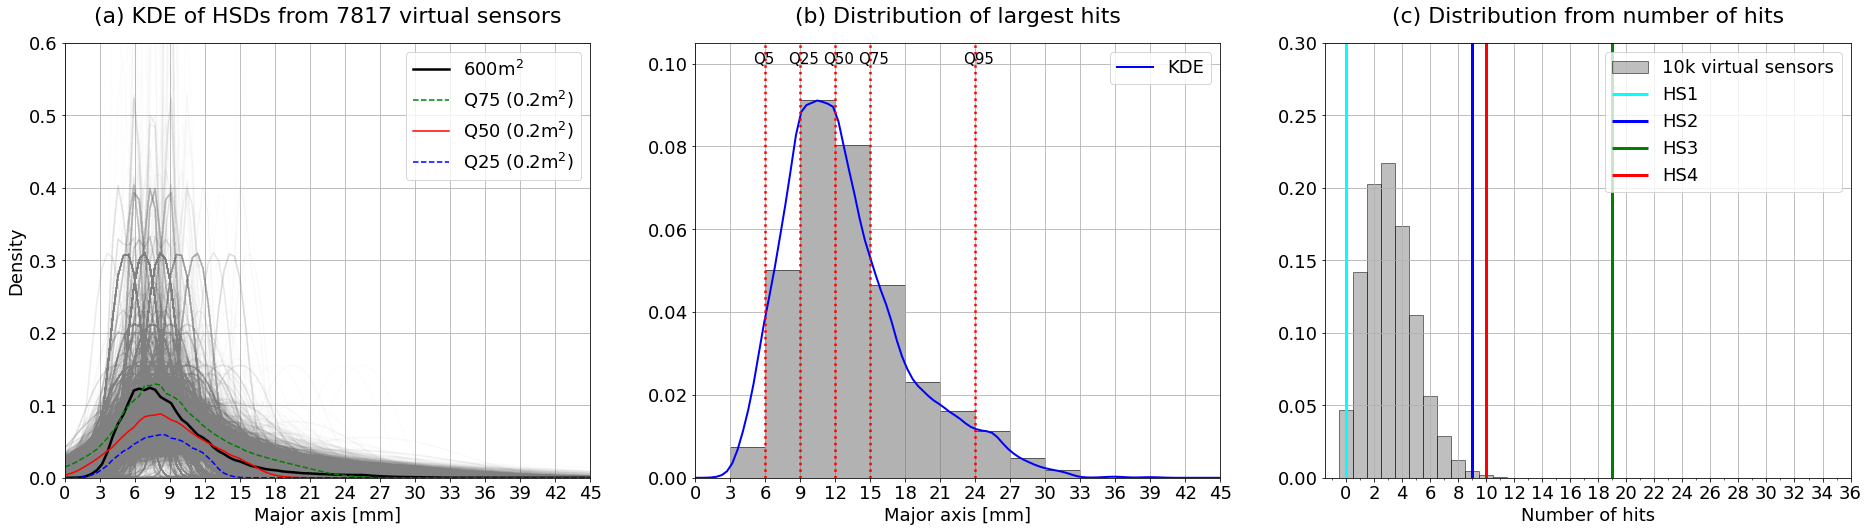

In [79]:
#Plot KDE distributions for all V-Sensors and the redueoced drone data to the 600m2
from scipy import stats
import warnings
import matplotlib.ticker as tck
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore")

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Make array of number of hits
nb_hits = []
for hits in vsensor_dict['major']:    
    nb = np.size(hits)
    nb_hits.append(nb)
nb_hits = np.asarray(nb_hits)

plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
xx = np.linspace(0,45,100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=[32,8])

for dis in distribs:
    ax1.plot(xx, dis, color='grey',alpha=0.02)
    
ax1.plot(xx, kde_drone(xx), color='black', linewidth=2.5, label="600m$^{2}$")
distribs_sort = np.sort(distribs, axis = 0)
it = np.size(distribs_sort,0)
ax1.plot(xx, distribs_sort[int(it*0.75)],'--g',label='Q75 (0.2m$^{2}$)')
ax1.plot(xx, distribs_sort[int(it*0.5)],'r',label='Q50 (0.2m$^{2}$)')
ax1.plot(xx, distribs_sort[int(it*0.25)],'--b',label='Q25 (0.2m$^{2}$)')
ax1.set_title('(a) KDE of HSDs from '+np.str(np.size(distribs,0))+' virtual sensors', pad=20)
ax1.legend()
ax1.grid()
ax1.set_xlim([0,45])
ax1.set_ylim([0,0.6])

lh_data = np.array(largest_hail_list)[~np.isnan(largest_hail_list)]
kde = stats.gaussian_kde(lh_data)
ax2.plot(xx, kde(xx),color='blue',label='KDE', linewidth=2)

numBins = 18
counts, edges, bars = ax2.hist(lh_data,numBins,range=[3,45+12],color=['grey'],alpha=0.6, edgecolor='black',density=True)

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = np.nanquantile(lh_data, 0.05), np.nanquantile(lh_data, 0.25), np.nanquantile(lh_data, 0.5), np.nanquantile(lh_data, 0.75), np.nanquantile(lh_data, 0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax2.axvline(i[0], alpha = 1, ymax = 1, linestyle = ":",color='red',linewidth=2.5)

ax2.text(quant_5 - 1, 0.1, "Q5",  size  = 15, alpha = 1,color='black')
ax2.text(quant_25- 1, 0.1, "Q25", size = 15, alpha = 1,color='black')
ax2.text(quant_50- 1, 0.1, "Q50", size = 15, alpha = 1,color='black')
ax2.text(quant_75- 1, 0.1, "Q75", size = 15, alpha = 1,color='black')
ax2.text(quant_95- 1, 0.1, "Q95", size = 15, alpha = 1,color='black')
ax2.legend()
ax2.grid()
ax2.set_xlim([0,45])
ax2.set_ylim([0,0.105])
ax2.set_title('(b) Distribution of largest hits', pad=20)

ax1.set_xticks(np.linspace(0,39+6,14+2))
ax2.set_xticks(np.linspace(0,39+6,14+2))
ax1.set_xlabel('Major axis [mm]')
ax2.set_xlabel('Major axis [mm]')
ax1.set_ylabel('Density')

numBinsV = 13
countsV, edgesV, barsV = ax3.hist(nb_hits,numBinsV,range=[-0.5,12.5],color=['grey'],alpha=0.5, edgecolor='black',density=True, label='10k virtual sensors')

ax3.vlines(0,0,1, color='cyan',linewidth=3,label='HS1')
ax3.vlines(np.size(hs_schENT),0,1, color='blue',linewidth=3,label='HS2')
ax3.vlines(np.size(hs_wasHAS[0:19]),0,1, color='green',linewidth=3,label='HS3')
ax3.vlines(np.size(hs_lusENT),0,1, color='red',linewidth=3,label='HS4')

#ax3.bar_label(barsV)
ax3.set_xlabel('Number of hits')
#ax3.set_ylabel('Density')
ax3.set_ylim([0,0.3])

ax3.set_xticks(np.linspace(0,36,19))
ax3.set_xticklabels(str_lab)
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.set_title('(c) Distribution from number of hits', pad=20)
ax3.grid()
ax3.legend()

plt.savefig(plot_dir+'Vsensor_analyses_REV.png',dpi=400,bbox_inches='tight',facecolor='white')

In [61]:
#Find optimal number of random distributions where the median fits best to the full area of 600m2
distribs = np.array(distribs)

distribs_sampled = []

ss = 100
for i in range(2,80):
    samp = random.sample(range(0, np.size(distribs,0)),ss)
    its = np.sort(samp)
    distribs_sort = np.sort(distribs[its,:], axis = 0)
    it = np.size(distribs_sort,0)
    sel = distribs_sort[int(it*0.5)]
    distribs_sampled.append(sel)
    ss = ss + 100

In [62]:
delta = pdf_gamma_drone_600 - distribs_sampled

In [63]:
np.sum(delta, axis = 1)

array([1.18951539, 1.25375014, 1.20528301, 1.38664658, 1.36588075,
       1.40805406, 1.31015273, 1.38508318, 1.27927312, 1.28629002,
       1.24287665, 1.27771444, 1.3133011 , 1.30124793, 1.25388794,
       1.26274779, 1.27783931, 1.29156076, 1.24469511, 1.27408338,
       1.27793081, 1.33452965, 1.30540924, 1.29812444, 1.32926006,
       1.283051  , 1.27006969, 1.28461171, 1.28885705, 1.30388187,
       1.32766827, 1.30358083, 1.30248705, 1.29528948, 1.30690917,
       1.28715136, 1.28992441, 1.29826799, 1.29532465, 1.29594189,
       1.3088873 , 1.33939654, 1.32955657, 1.29447986, 1.29847556,
       1.31015663, 1.3140477 , 1.30984788, 1.29611337, 1.30977687,
       1.30020336, 1.30244791, 1.3176364 , 1.30328668, 1.30574418,
       1.2982326 , 1.29523774, 1.30544245, 1.3012271 , 1.30506549,
       1.29549497, 1.29470973, 1.30402139, 1.3078116 , 1.3024078 ,
       1.30496153, 1.30105959, 1.31577019, 1.30643315, 1.30828758,
       1.31132245, 1.30790195, 1.30964412, 1.30597895, 1.30585

Text(0.5, 1.0, 'QQ plot')

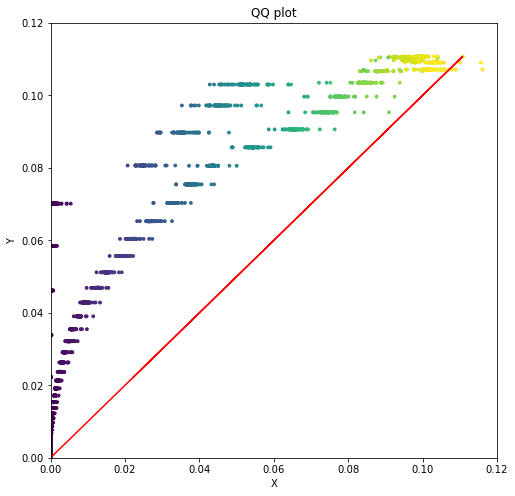

In [64]:
plt.figure(figsize=(8, 8))

for dist in distribs_sampled:
    plt.scatter(dist, pdf_gamma_drone_600,s=8, c=dist)

plt.plot(pdf_gamma_drone_600, pdf_gamma_drone_600, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([0,0.12])
plt.ylim([0,0.12])

#plt.legend()
plt.title("QQ plot")

In [116]:
#Area of sensor placement:
xmin = 2400
xmax = 19393
ymin = 3700
ymax = 19393

area = (xmax-xmin)*1.5 * (ymax-ymin)*1.5 / 1000 / 1000
print(area)

600.01008525


In [26]:
np.where(np.asarray(hd_p2['major_ma'][:]) >= 30.)

(array([ 112,  251, 1069, 1954, 2183, 2587, 3249, 3442, 3582, 3974, 4505,
        4706, 4863, 5087, 5205, 5656, 6075, 6552, 6931]),)

In [27]:
np.where(np.asarray(hd_p1['major_ma'][:]) >= 30.)

(array([ 400,  615,  719, 1621, 1672, 2190, 2271, 2533, 2698, 2944, 3330,
        3374, 3806]),)

In [28]:
np.where(np.asarray(hd_p3['major_ma'][:]) >= 30.)

(array([ 193,  371,  936, 1034, 1075, 1223, 2008, 2132, 2992, 3092, 3495,
        4850, 5035]),)

In [37]:
import shutil
i30 = np.where(major_ax >= 30)
path_all = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/all_images/detection_ml/rgb/all/'
path_cp = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/all_images/detection_ml/rgb/i30/'

for ind in i30[0]:
    #print(ind)
    x = hail_co_x[ind]
    y = hail_co_y[ind]
    shutil.copy(path_all+'hail_x'+str(x)+'_y'+str(y)+'_rgb.png', path_cp)

Old plot for paper

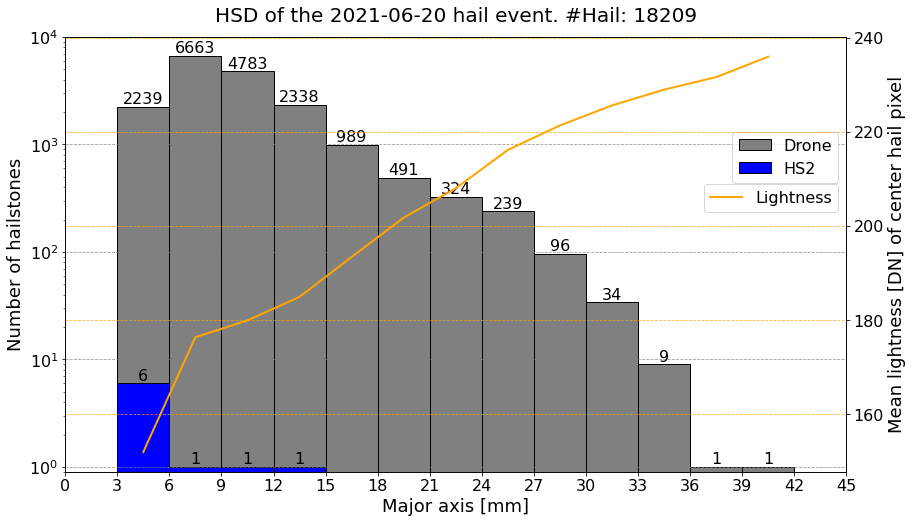

In [15]:
edges = np.linspace(0,39+6,16)
ldata = scipy.stats.binned_statistic(major_ax, L_center, statistic='mean', bins=edges)

plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
        
#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


n_hail_ml = np.sum(~np.isnan(major_ax))

fig, ax = plt.subplots(figsize=[14,8])
fig.patch.set_facecolor('white')

numBins = 14+4
counts, edges, bars = ax.hist([major_ax],numBins,range=[3,45+12],color=['grey'],alpha=1, edgecolor='black',label='Drone')
cs, eds, bs = ax.hist([hs_schENT],numBins,range=[3,45+12],color=['blue'],alpha=1, edgecolor='black',label='HS2')

ax.bar_label(bars)
ax.bar_label(bs)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
ax.set_title('HSD of the 2021-06-20 hail event. #Hail: '+str(n_hail_ml),fontsize=20,pad=15)
ax.set_ylim([0.9,10000])
ax.set_xlim([0,45])
ax.set_yscale('log')
ax.grid(axis='y',color='grey',linestyle='--',alpha=0.8)
ax.set_xticks(np.linspace(0,39+6,14+2))
ax.set_ylabel('Number of hailstones')
ax.set_xlabel('Major axis [mm]')
ax.legend(bbox_to_anchor=(1,0.8))

# Twin Axes
ax2 = ax.twinx()
ax2.set_ylabel('Mean lightness [DN] of center hail pixel')
ax2.plot(edges[0:13]+1.5, ldata.statistic[0:13],color='orange',linewidth=2, label='Lightness')
ax2.legend(bbox_to_anchor=(1,0.68))
ax2.grid(axis='y',color='orange', linestyle='--', alpha=0.8)

plt.savefig(plot_dir+'Hailsize_distribution_major_mask_log.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()

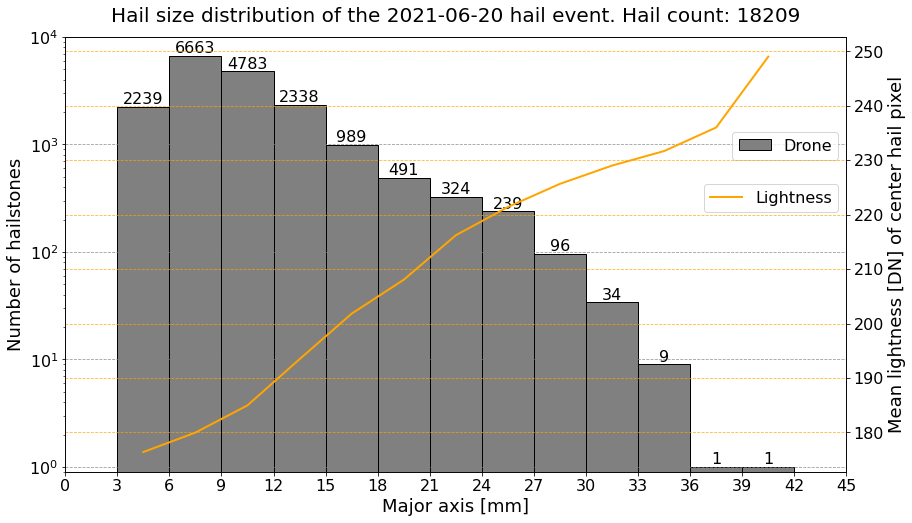

In [20]:
edges = np.linspace(0,39+6,16)
ldata = scipy.stats.binned_statistic(major_ax, L_center, statistic='mean', bins=edges)

plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
        
#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

n_hail_ml = np.sum(~np.isnan(major_ax))

fig, ax = plt.subplots(figsize=[14,8])
fig.patch.set_facecolor('white')

numBins = 14+4
counts, edges, bars = ax.hist([major_ax],numBins,range=[3,45+12],color=['grey'],alpha=1, edgecolor='black',label='Drone')

ax.bar_label(bars)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
ax.set_title('Hail size distribution of the 2021-06-20 hail event. Hail count: '+str(n_hail_ml),fontsize=20,pad=15)
ax.set_ylim([0.9,10000])
ax.set_xlim([0,45])
ax.set_yscale('log')
ax.grid(axis='y',color='grey',linestyle='--',alpha=0.8)
ax.set_xticks(np.linspace(0,39+6,14+2))
ax.set_ylabel('Number of hailstones')
ax.set_xlabel('Major axis [mm]')
ax.legend(bbox_to_anchor=(1,0.8))

# Twin Axes
ax2 = ax.twinx()
ax2.set_ylabel('Mean lightness [DN] of center hail pixel')
ax2.plot(edges[0:13]+1.5, ldata.statistic[1:14],color='orange',linewidth=2, label='Lightness')
ax2.legend(bbox_to_anchor=(1,0.68))
ax2.grid(axis='y',color='orange', linestyle='--', alpha=0.8)

plt.savefig(plot_dir+'figure_8_REV.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()

In [18]:
ldata

BinnedStatisticResult(statistic=array([152.        , 176.39883877, 179.96773225, 184.96717541,
       193.44739093, 201.80485339, 208.03665988, 216.2037037 ,
       221.39748954, 225.64583333, 229.        , 231.66666667,
       236.        , 249.        ,          nan]), bin_edges=array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
       39., 42., 45.]), binnumber=array([4, 3, 4, ..., 2, 8, 3]))

In [19]:
edges

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.,
       42., 45., 48., 51., 54., 57.])

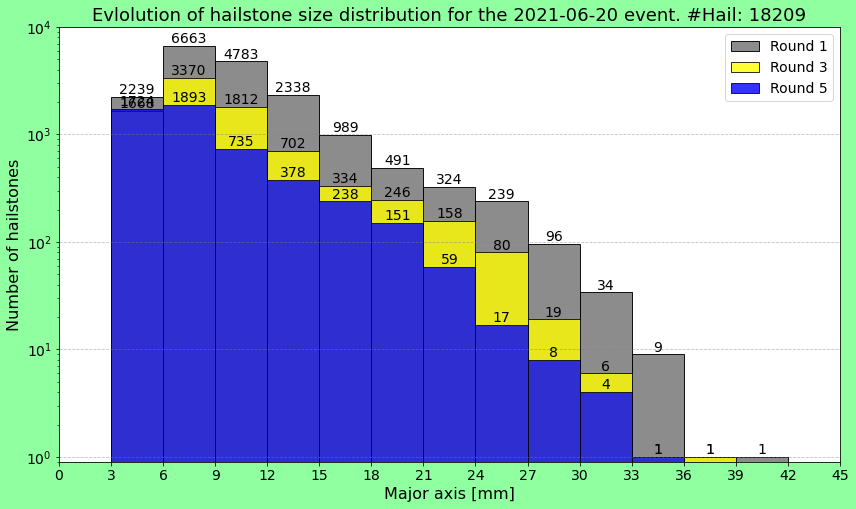

In [9]:
plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/melting/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
        
#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


n_hail_ml = np.sum(~np.isnan(major_ax))

fig, ax = plt.subplots(figsize=[14,8])
fig.patch.set_facecolor('xkcd:mint green')

numBins = 14+4
counts, edges, bars = ax.hist([major_ax],numBins,range=[3,45+12],color=['grey'],alpha=0.9, edgecolor='black',label='Round 1')
counts3, edges3, bars3 = ax.hist(hd_r3['major_ma'],numBins,range=[3,45+12],color=['yellow'],alpha=0.8, edgecolor='black',label='Round 3')
counts5, edges5, bars5 = ax.hist(hd_r5['major_ma'],numBins,range=[3,45+12],color=['blue'],alpha=0.8, edgecolor='black',label='Round 5')

#cs, eds, bs = ax.hist([dat_ENT['diameter'].values],numBins,range=[3,45+12],color=['blue'],alpha=0.9, edgecolor='black',label='HailSens')

plt.bar_label(bars)
plt.bar_label(bars3)
plt.bar_label(bars5)

#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
plt.title('Evlolution of hailstone size distribution for the 2021-06-20 event. #Hail: '+str(n_hail_ml),fontsize=18)
plt.ylim([0.9,10000])
plt.xlim([0,45])
plt.yscale('log')
plt.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
plt.xticks(np.linspace(0,39+6,14+2))
plt.ylabel('Number of hailstones')
plt.xlabel('Major axis [mm]')
plt.legend(loc='upper right')
plt.savefig(plot_dir+'melting_hail_distribution_log.png',dpi=300,bbox_inches='tight',facecolor='xkcd:mint green')
plt.show()

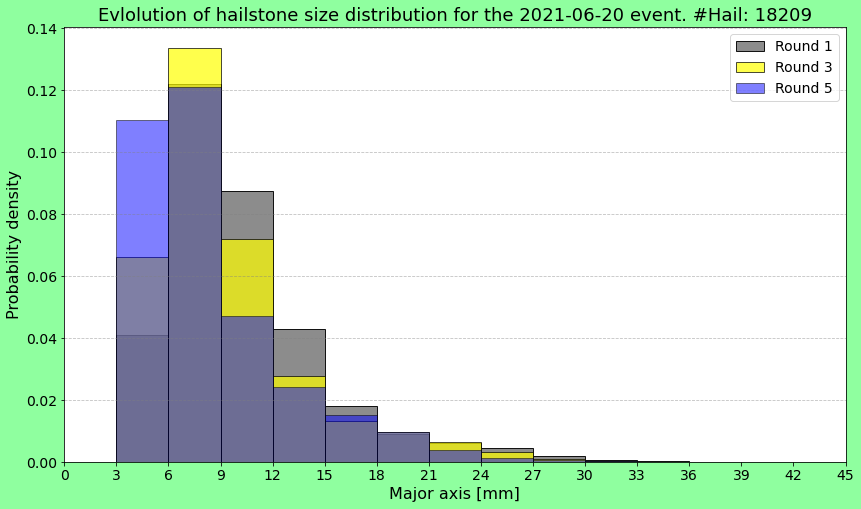

In [12]:
plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/melting/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
        
#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


n_hail_ml = np.sum(~np.isnan(major_ax))

fig, ax = plt.subplots(figsize=[14,8])
fig.patch.set_facecolor('xkcd:mint green')

numBins = 14+4
counts, edges, bars = ax.hist([major_ax],numBins,range=[3,45+12],color=['grey'],alpha=0.9, edgecolor='black',label='Round 1',density=True)
counts3, edges3, bars3 = ax.hist(hd_r3['major_ma'],numBins,range=[3,45+12],color=['yellow'],alpha=0.7, edgecolor='black',label='Round 3',density=True)
counts5, edges5, bars5 = ax.hist(hd_r5['major_ma'],numBins,range=[3,45+12],color=['blue'],alpha=0.5, edgecolor='black',label='Round 5',density=True)

#cs, eds, bs = ax.hist([dat_ENT['diameter'].values],numBins,range=[3,45+12],color=['blue'],alpha=0.9, edgecolor='black',label='HailSens')

#plt.bar_label(bars)
#plt.bar_label(bars3)
#plt.bar_label(bars5)

#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
plt.title('Evlolution of hailstone size distribution for the 2021-06-20 event. #Hail: '+str(n_hail_ml),fontsize=18)
#plt.ylim([0.9,10000])
plt.xlim([0,45])
#plt.yscale('log')
plt.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
plt.xticks(np.linspace(0,39+6,14+2))
plt.ylabel('Probability density')
plt.xlabel('Major axis [mm]')
plt.legend(loc='upper right')
plt.savefig(plot_dir+'melting_hail_distribution_log_density.png',dpi=300,bbox_inches='tight',facecolor='xkcd:mint green')
plt.show()

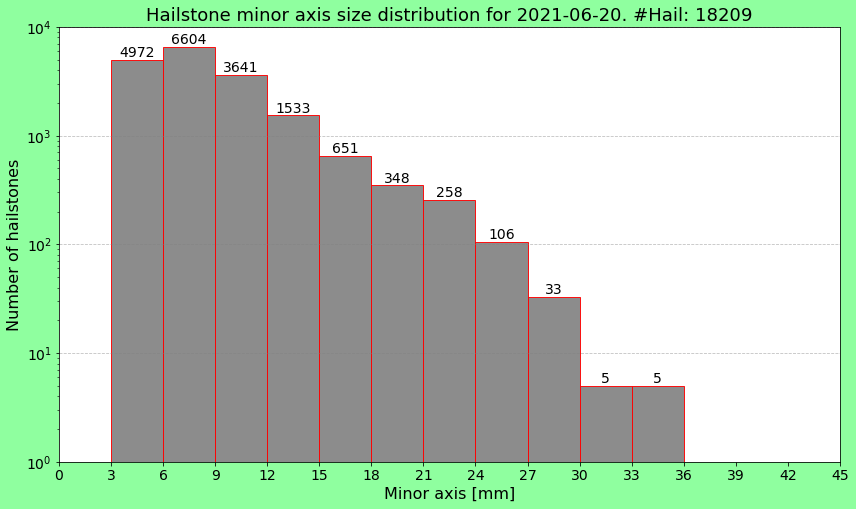

In [80]:
plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
        
#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


n_hail_ml = np.sum(~np.isnan(minor_ax))

fig, ax = plt.subplots(figsize=[14,8])
fig.patch.set_facecolor('xkcd:mint green')

numBins = 14+4
counts, edges, bars = ax.hist([minor_ax],numBins,range=[3,45+12],color=['grey'],alpha=0.9, edgecolor='black')
plt.bar_label(bars)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
plt.title('Hailstone minor axis size distribution for the 2021-06-20 event. #Hail: '+str(n_hail_ml),fontsize=18)
plt.ylim([1,10000])
plt.xlim([0,45])
plt.yscale('log')
plt.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
plt.xticks(np.linspace(0,39+6,14+2))
plt.ylabel('Number of hailstones')
plt.xlabel('Minor axis [mm]')
#plt.legend(loc='upper right')
plt.savefig(plot_dir+'Hailsize_distribution_minor_mask_log.png',dpi=300,bbox_inches='tight',facecolor='xkcd:mint green')
plt.show()

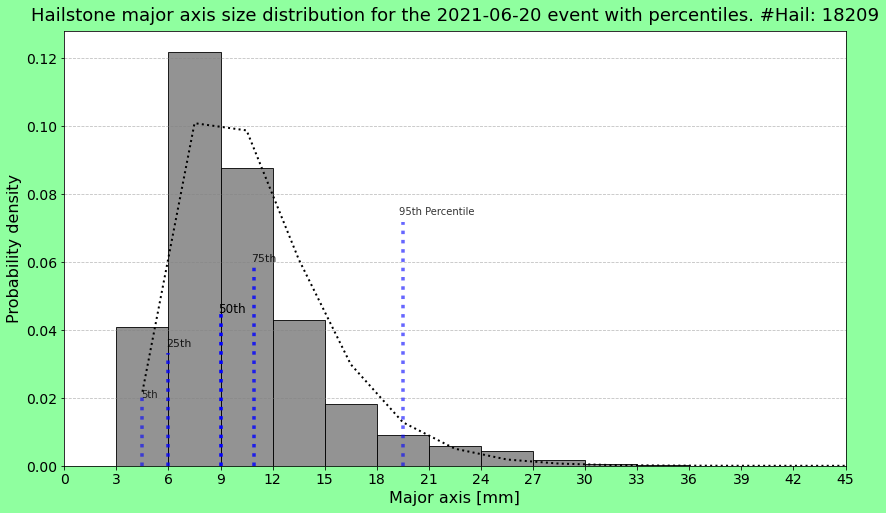

In [43]:
import scipy
plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

n_hail_ml = np.sum(~np.isnan(major_ax))

fig, ax = plt.subplots(figsize=[14,8])
fig.patch.set_facecolor('xkcd:mint green')

numBins = 14+4
counts, bins, bars = ax.hist([major_ax],numBins,range=[3,45+12],color=['grey'],alpha=0.85, edgecolor='black',density=True)

#Gamma distribution
a, b, c = scipy.stats.gamma.fit(major_ax[~np.isnan(major_ax)])
best_fit_line = scipy.stats.gamma.pdf(bins, a, b, c)

plt.plot(bins+1.5, best_fit_line, color='black',linewidth=2, linestyle=':')

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = np.nanquantile(major_ax, 0.05), np.nanquantile(major_ax, 0.25), np.nanquantile(major_ax, 0.5), np.nanquantile(major_ax, 0.75), np.nanquantile(major_ax, 0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":",color='blue',linewidth=3.5)

ax.text(quant_5-.1, 0.02, "5th", size = 10, alpha = 0.8,color='black')
ax.text(quant_25-.13, 0.035, "25th", size = 11, alpha = 0.85,color='black')
ax.text(quant_50-.13, 0.045, "50th", size = 12, alpha = 1,color='black')
ax.text(quant_75-.13, 0.06, "75th", size = 11, alpha = 0.85,color='black')
ax.text(quant_95-.25, 0.074, "95th Percentile", size = 10, alpha =.8,color='black')    
    
#Normal distribution
#mu, sigma = scipy.stats.norm.fit(major_ax[~np.isnan(major_ax)])
#best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)



#plt.bar_label(bars)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
plt.title('Hailstone major axis size distribution for the 2021-06-20 event with percentiles. #Hail: '+str(n_hail_ml),fontsize=18,pad=10)
#plt.ylim([1,8000])
plt.xlim([0,45])
#plt.yscale('log')
plt.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
plt.xticks(np.linspace(0,39+6,14+2))
plt.ylabel('Probability density')
plt.xlabel('Major axis [mm]')
#plt.legend(loc='upper right')
plt.savefig(plot_dir+'Hailsize_distribution_major_mask_pdf_gamma.png',dpi=300,bbox_inches='tight',facecolor='xkcd:mint green')
plt.show()

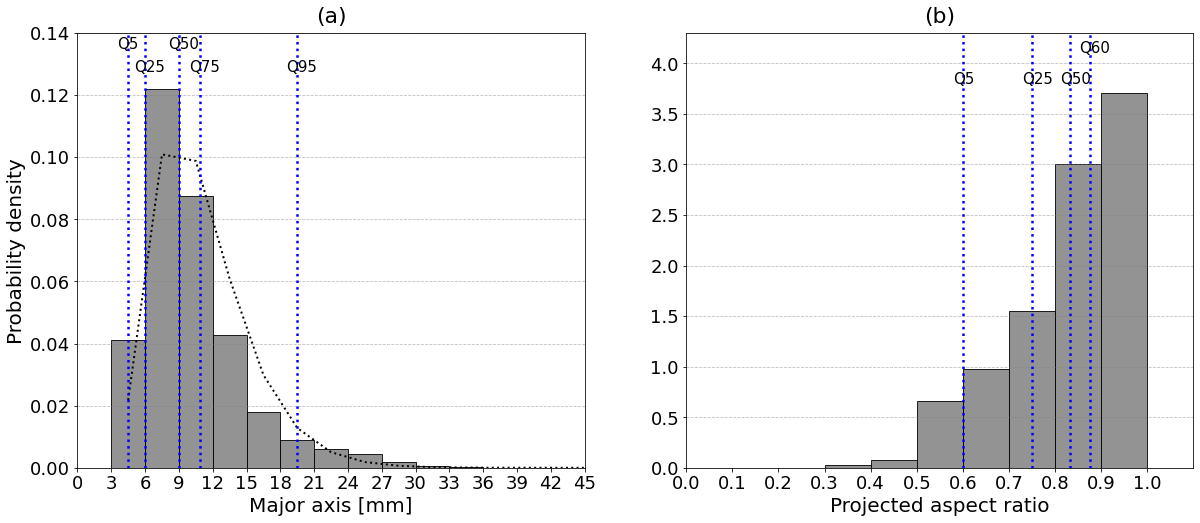

In [3]:
import scipy
plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

n_hail_ml = np.sum(~np.isnan(major_ax))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=[20,8])
fig.patch.set_facecolor('white')

numBins = 14+4
counts, bins, bars = ax1.hist([major_ax],numBins,range=[3,45+12],color=['grey'],alpha=0.85, edgecolor='black',density=True)

#Gamma distribution
a, b, c = scipy.stats.gamma.fit(major_ax[~np.isnan(major_ax)])
best_fit_line = scipy.stats.gamma.pdf(bins, a, b, c)

ax1.plot(bins+1.5, best_fit_line, color='black',linewidth=2, linestyle=':')

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = np.nanquantile(major_ax, 0.05), np.nanquantile(major_ax, 0.25), np.nanquantile(major_ax, 0.5), np.nanquantile(major_ax, 0.75), np.nanquantile(major_ax, 0.95)

# [quantile, opacity, length]
quants = [[quant_5, 1, 0.16], [quant_25, 1, 0.26], [quant_50, 1, 0.36],  [quant_75, 1, 0.46], [quant_95, 1, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax1.axvline(i[0], alpha = 1, ymax = 1, linestyle = ":",color='blue',linewidth=2.5)

ax1.text(quant_5 - 1, 0.135, "Q5",  size = 15, alpha = 1, color='black')
ax1.text(quant_25- 1, 0.1275 , "Q25", size = 15, alpha = 1, color='black')
ax1.text(quant_50- 1, 0.135, "Q50", size = 15, alpha = 1, color='black')
ax1.text(quant_75- 1, 0.1275 , "Q75", size = 15, alpha = 1, color='black')
ax1.text(quant_95- 1, 0.1275 , "Q95", size = 15, alpha = 1, color='black')    
    
#plt.bar_label(bars)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
ax1.set_title('(a)',fontsize=22,pad=10)
#plt.ylim([1,8000])
ax1.set_xlim([0,45])
ax1.set_ylim([0,0.14])
#plt.yscale('log')
ax1.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
ax1.set_xticks(np.linspace(0,39+6,14+2))
ax1.set_ylabel('Probability density')
ax1.set_xlabel('Major axis [mm]')

aspect_ratio = minor_ax/major_ax

numBins2 = 10
counts, bins, bars = ax2.hist([aspect_ratio],numBins2,range=[0,1],color=['grey'],alpha=0.85, edgecolor='black',density=True)

#Gamma distribution
#a, b, c = scipy.stats.gamma.fit(aspect_ratio[~np.isnan(aspect_ratio)])
#best_fit_line = scipy.stats.gamma.pdf(bins, a, b, c)

#plt.plot(bins+1.5, best_fit_line, color='black',linewidth=2, linestyle=':')

# Calculate percentiles
quant_5, quant_25, quant_50, quant_60 = np.nanquantile(aspect_ratio, 0.05), np.nanquantile(aspect_ratio, 0.25), np.nanquantile(aspect_ratio, 0.50), np.nanquantile(aspect_ratio, 0.60)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.1], [quant_25, 0.8, 0.2], [quant_50, 1, 0.3], [quant_60, 0.8, 0.4]]

# Plot the lines with a loop
for i in quants:
    ax2.axvline(i[0], alpha = 1, ymax = 1, linestyle = ":",color='blue',linewidth=2.5)

ax2.text(quant_5-.022, 3.8, "Q5", size = 15, alpha = 1,color='black')
ax2.text(quant_25-.022, 3.8, "Q25", size = 15, alpha = 1,color='black')
ax2.text(quant_50-.022, 3.8, "Q50", size = 15, alpha = 1,color='black')
ax2.text(quant_60-.022, 4.1, "Q60", size = 15, alpha = 1,color='black')
    
#Normal distribution
#mu, sigma = scipy.stats.norm.fit(major_ax[~np.isnan(major_ax)])
#best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

#plt.bar_label(bars)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
ax2.set_title('(b)',fontsize=22,pad=10)
#plt.ylim([1,8000])
ax2.set_xlim([0,1.1])
ax2.set_ylim([0,4.3])

#plt.xscale('log')
ax2.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
ax2.set_xticks(np.linspace(0,1,11))
#ax2.set_ylabel('Probability density')
ax2.set_xlabel('Projected aspect ratio')

#plt.legend(loc='upper right')
plt.savefig(plot_dir+'figure_11.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()

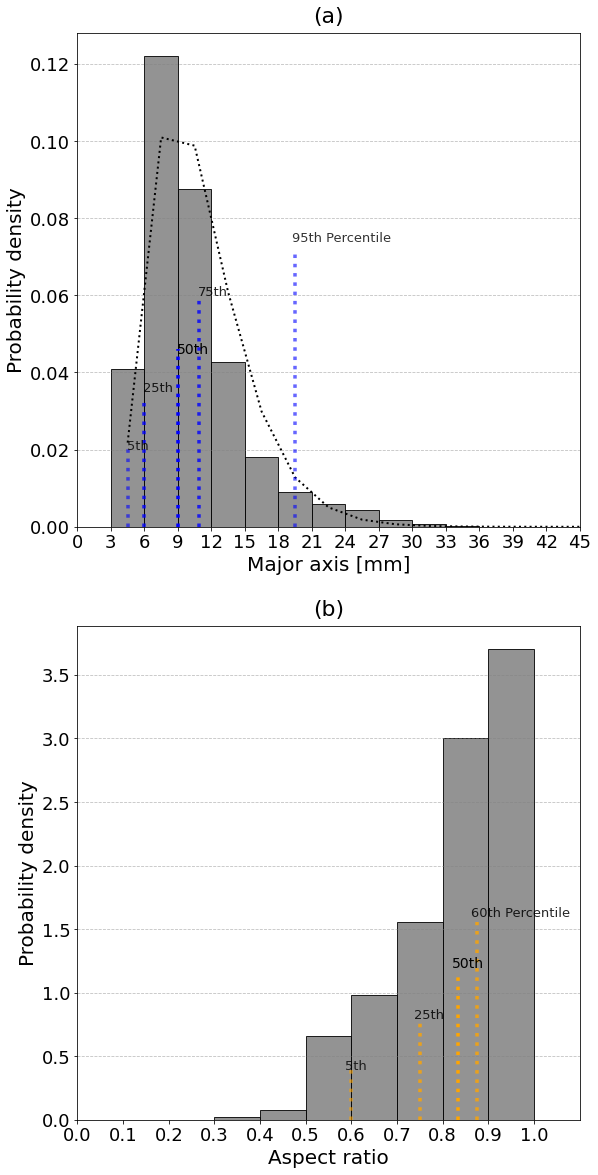

In [6]:
#Plot for ESSL Poster
import scipy
plot_dir = '/home/martin/container/hail/poster/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

n_hail_ml = np.sum(~np.isnan(major_ax))

fig, (ax1, ax2) = plt.subplots(2,1,figsize=[9,20])
fig.patch.set_facecolor('white')

numBins = 14+4
counts, bins, bars = ax1.hist([major_ax],numBins,range=[3,45+12],color=['grey'],alpha=0.85, edgecolor='black',density=True)

#Gamma distribution
a, b, c = scipy.stats.gamma.fit(major_ax[~np.isnan(major_ax)])
best_fit_line = scipy.stats.gamma.pdf(bins, a, b, c)

ax1.plot(bins+1.5, best_fit_line, color='black',linewidth=2, linestyle=':')

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = np.nanquantile(major_ax, 0.05), np.nanquantile(major_ax, 0.25), np.nanquantile(major_ax, 0.5), np.nanquantile(major_ax, 0.75), np.nanquantile(major_ax, 0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax1.axvline(i[0], alpha = 1, ymax = i[2], linestyle = ":",color='blue',linewidth=3.5)

ax1.text(quant_5-.1, 0.02, "5th", size = 13, alpha = 0.8,color='black')
ax1.text(quant_25-.13, 0.035, "25th", size = 13, alpha = 0.85,color='black')
ax1.text(quant_50-.13, 0.045, "50th", size = 13, alpha = 1,color='black')
ax1.text(quant_75-.13, 0.06, "75th", size = 13, alpha = 0.85,color='black')
ax1.text(quant_95-.25, 0.074, "95th Percentile", size = 13, alpha =.8,color='black')    
    
#plt.bar_label(bars)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
ax1.set_title('(a)',fontsize=22,pad=10)
#plt.ylim([1,8000])
ax1.set_xlim([0,45])
ax1.set_ylim([0,0.14])
#plt.yscale('log')
ax1.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
ax1.set_xticks(np.linspace(0,39+6,14+2))
ax1.set_ylabel('Probability density')
ax1.set_xlabel('Major axis [mm]')

aspect_ratio = minor_ax/major_ax

numBins2 = 10
counts, bins, bars = ax2.hist([aspect_ratio],numBins2,range=[0,1],color=['grey'],alpha=0.85, edgecolor='black',density=True)

#Gamma distribution
#a, b, c = scipy.stats.gamma.fit(aspect_ratio[~np.isnan(aspect_ratio)])
#best_fit_line = scipy.stats.gamma.pdf(bins, a, b, c)

#plt.plot(bins+1.5, best_fit_line, color='black',linewidth=2, linestyle=':')

# Calculate percentiles
quant_5, quant_25, quant_50, quant_60 = np.nanquantile(aspect_ratio, 0.05), np.nanquantile(aspect_ratio, 0.25), np.nanquantile(aspect_ratio, 0.50), np.nanquantile(aspect_ratio, 0.60)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.1], [quant_25, 0.8, 0.2], [quant_50, 1, 0.3], [quant_60, 0.8, 0.4]]

# Plot the lines with a loop
for i in quants:
    ax2.axvline(i[0], alpha = 1, ymax = 4, linestyle = ":",color='orange',linewidth=3.5)

ax2.text(quant_5-.013, 0.4, "5th", size = 13, alpha = 1,color='black')
ax2.text(quant_25-.013, 0.8, "25th", size = 13, alpha = 1,color='black')
ax2.text(quant_50-.013, 1.2, "50th", size = 13, alpha = 1,color='black')
ax2.text(quant_60-.013, 1.6, "60th Percentile", size = 13, alpha = 1,color='black')
    
#Normal distribution
#mu, sigma = scipy.stats.norm.fit(major_ax[~np.isnan(major_ax)])
#best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

#plt.bar_label(bars)
#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
ax2.set_title('(b)',fontsize=22,pad=10)
#plt.ylim([1,8000])
ax2.set_xlim([0,1.1])
ax2.set_ylim([0,4.5])
#plt.xscale('log')
ax2.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Aspect ratio')

#plt.legend(loc='upper right')
plt.savefig(plot_dir+'Hailsize_distribution_major_axis_and_aspect_ratio_REV.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()

In [92]:
quant_25

0.75

In [ ]:
plot_dir = '/home/martin/container/hail/detectron2/products/hparam_tuning/run-3/plots/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
        
#Plot real distribution of test dataset man vs machine
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

n_hail_ml = np.sum(~np.isnan(major_ax))

fig, ax = plt.subplots(figsize=[14,8])
fig.patch.set_facecolor('xkcd:mint green')

numBins = 18
bins_l = ax.hist([L_center],numBins,range=[75,255],color=['black'],alpha=0.9, edgecolor='red')

#ax.hist(data,numBins,range=[2.5,42.5],color='blue',alpha=0.8, edgecolor='black')
plt.title('Lightness distribution for 2021-06-20. #Hail: '+str(n_hail_ml),fontsize=16)
plt.ylim([1,10000])
plt.xlim([51,255])
plt.yscale('log')
plt.grid(axis='y',color='grey',linestyle='--',alpha=0.5)
#plt.xticks(np.linspace(0,39+18,14+6))
plt.ylabel('Number of hailstones')
plt.xlabel('Lightness [DN]')
#plt.legend(loc='upper right')
plt.show()
plt.savefig(plot_dir+'Lightness_distribution_minor_mask_log.png',dpi=300,bbox_inches='tight')